---
title: "4.2-DBScan Clustering"
author: "Ahmed Aredah"
date: "11.22.2023"
output: html_document
editor: visual
categories:
    Clustering
    
---

## Overview

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an influential unsupervised machine learning algorithm primarily used for clustering tasks. Unlike K-Means, which partitions data into a specified number of clusters, DBSCAN does not require a predefined number of clusters. It is especially useful in identifying clusters of arbitrary shapes and sizes in a dataset and is adept at handling outliers.

## Mathematical Description

The core concept of DBSCAN is to group closely packed points together, marking outliers that lie alone in low-density regions. The algorithm operates on two key parameters: `ε` (epsilon) and `MinPts` (minimum points). The steps are as follows:

1. **Identification of Core Points**: For each point in the dataset, if the number of points within a radius `ε` is at least `MinPts`, it is marked as a core point.

2. **Expansion of Clusters**: From each core point, other reachable points within the radius `ε` are added to the cluster, including other core points, forming a connected group.

3. **Handling Noise**: Points that are not reachable from any core point are labeled as outliers or noise.

The effectiveness of DBSCAN largely depends on the choice of `ε` and `MinPts`. A small `ε` might lead to many small clusters, while a large `ε` can merge distinct clusters.

### Advantages and Limitations

DBSCAN has several advantages:

- It does not require specifying the number of clusters a priori.
- It can find arbitrarily shaped clusters and deal with noise and outliers effectively.
- It requires minimal domain knowledge to determine the input parameters.

However, it also has limitations:

- Determining the right values for `ε` and `MinPts` can be challenging.
- It struggles with varying densities across clusters.
- It has a higher computational cost compared to K-Means for large datasets.

## Application

To demonstrate the practical use of K-Means, we can apply it to the same dataset we used in the classification section; however, we will ignore the provided labels and perhaps use these labels for a comparison.

In [6]:
#import required libraries
# Import required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import mode


#inline plots
%matplotlib inline

# Set Seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("whitegrid")

#supress warnings!
warnings.simplefilter(action='ignore', category=Warning)
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print("required libraries loaded successfully!")

required libraries loaded successfully!


In [19]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'

In [20]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert the data to a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

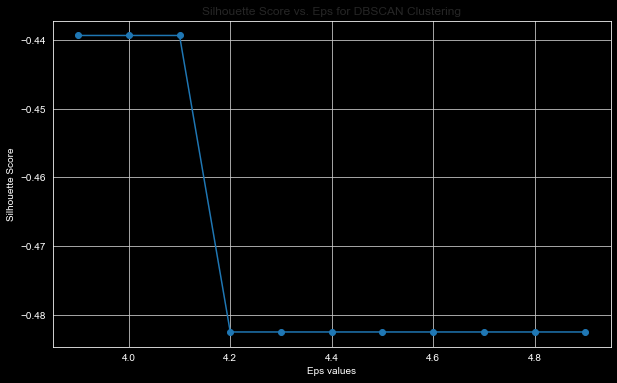

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ranges for eps and choose a constant min_samples value
eps_values = np.arange(0.1, 5.0, 0.1)
min_samples = 2

# Initialize lists to store the eps values and corresponding silhouette scores
eps_list = []
silhouette_scores = []

# Iterate over eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    # Fit the model and predict clusters
    y_pred = dbscan.fit_predict(X_train)
    # Calculate the silhouette score only if there are more than 1 cluster and less than n_samples - 1 noise points
    if len(set(y_pred)) > 1 and len(set(y_pred)) < len(X_train) - 1:
        silhouette = silhouette_score(X_train, y_pred)
        eps_list.append(eps)
        silhouette_scores.append(silhouette)

# Plotting the silhouette scores against eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_list, silhouette_scores, marker='o')
plt.xlabel('Eps values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Eps for DBSCAN Clustering')
plt.grid(True)
plt.show()

The silhouette score is a measure used to evaluate the quality of clusters created by a clustering algorithm. It gives an indication of how well each object lies within its cluster, which is a reflection of both cluster cohesion and separation:

- Cohesion: How close an object is to other objects in its own cluster.
- Separation: How far away an object is from objects in other clusters.

The silhouette score ranges from -1 to +1:

- A high silhouette score (close to +1) indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. In other words, the object is close to other objects in its cluster and far from objects in other clusters, suggesting well-separated and distinct clusters.

- If the score is around 0, it indicates that the object is on or very close to the decision boundary between two neighboring clusters. This implies overlapping clusters.

- A negative silhouette score indicates that the object might have been assigned to the wrong cluster.

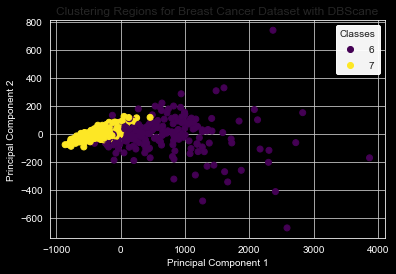

In [22]:
# Reduce the dimensionality of the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Train the model on the training data
dbscan.fit(X_train)

# Create a meshgrid for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Get the cluster assignments for each point in the meshgrid
Z = dbscan.fit_predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot the clustering regions
# plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y+6, cmap='viridis')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.gca().add_artist(legend)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Regions for Breast Cancer Dataset with DBScane')
plt.show()